# Assignment 1

All required code is a single line. The length of your response for questions that require identification and/or interpretation will not be considered in evaluation. For example, if a question can be answered with 'yes/no', or a numeric value, you may simply state as much. 

We will go through comparable code and concepts in the live learning session. If you run into trouble, start by using the help `help()` function in Python, to get information about the datasets and function in question. The internet is also a great resource when coding (though note that no outside searches are required by the assignment!). If you do incorporate code from the internet, please cite the source within your code (providing a URL is sufficient).

Please bring questions that you cannot work out on your own to office hours, work periods or share with your peers on Slack. We will work with you through the issue.

### Question 1: Simple Linear Regression 

Let's set up our workspace and use the `Boston` dataset in the `ISLP` library. Print `Boston` to learn more about the dataset.

In [23]:
# Import standard libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.pyplot import subplots
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Import specific objects
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

from statsmodels.stats.outliers_influence \
     import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)

In [2]:
# Load the "Boston" dataset using the "load_data" function from the ISLP package
Boston = load_data('Boston')

In [4]:
print(Boston.shape)
print(Boston.head())

(506, 13)
      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

   lstat  medv  
0   4.98  24.0  
1   9.14  21.6  
2   4.03  34.7  
3   2.94  33.4  
4   5.33  36.2  


Before we fit and review model outputs, we should visualize our data. Review the code and plot, shown below. Answer the following questions:

_(i)_ What are the `medv` and `dis` variables being plotted? (Hint: review this [link](https://islp.readthedocs.io/en/latest/datasets/Boston.html))

_(ii)_ What concept ‘defines’ the plotted line?

In [38]:
#Answers here:
'''  
(i) medv = median owner-occupied home value ($1000s)
    dis = weighted mean distance to 5 Boston employment centers (weights not defined)

(ii) single/simple linear regression

'''

'  \n(i) medv = median owner-occupied home value ($1000s)\n    dis = weighted mean distance to 5 Boston employment centers (weights not defined)\n\n(ii) single/simple linear regression\n\n'

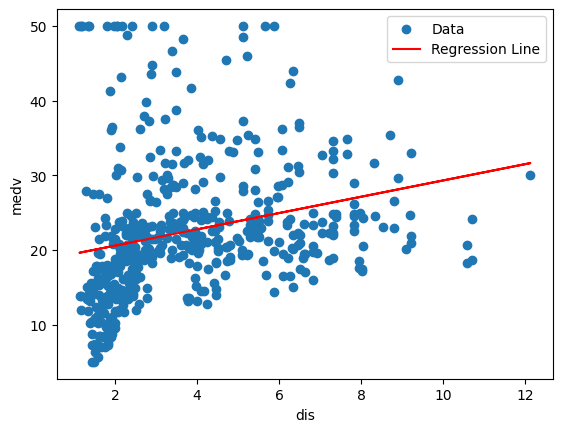

In [5]:
# Extract the variables
medv = Boston['medv'].values.reshape(-1, 1)
dis = Boston['dis'].values.reshape(-1, 1)

# Plot data
plt.scatter(dis, medv, label='Data')
plt.xlabel('dis')
plt.ylabel('medv')

# Fit a linear regression model
lm = LinearRegression()
lm.fit(dis, medv)

# Plot the regression line
plt.plot(dis, lm.predict(dis), color='red', label='Regression Line')

# Add labels and legend
plt.xlabel('dis')
plt.ylabel('medv')
plt.legend()

# Show the plot
plt.show()

Consider the variables plotted above. In the context of the `Boston` dataset:

_(iii)_ What is the (implied) null hypothesis? What is the (implied) alternative hypothesis?

_(iv)_ Now, let’s fit a simple regression model, using the general syntax `sm.OLS()` and `model.fit()`. As above, use `medv` as the response variable Y, and `dis` as the predictor variable X. (Hint: use the syntax `sm.add_constant` with the appropriate argument).

In [32]:
# Add your code here
'''  
(iii) implied null hypothesis: the median value of a Boston home is not linearly related it's distance to the 5 identified employment centers,
the variation observed is due to random chance.
implied alternative: there is a correlation between the distance to the employment centers and the value of a home
'''
#(iv)
alt_dis = sm.add_constant(dis , prepend=True , has_constant='skip')
model = sm.OLS( endog=medv , exog=alt_dis )
results = model.fit()

Review your model output to answer the following questions (Hint: use the `summary` and `conf_int` functions):    
_(v)_ What are the _coefficient estimates_ for $B_0$ (intercept) and $B_1$ (slope)?  
_(vi)_ What are the _standard errors_ for $B_0$ and $B_1$?  
_(vii)_ What are the _confidence intervals_ for $B_0$ and $B_1$?  


In [35]:
# Your answer here
print(results.summary())
print(results.conf_int())

'''
_(v)_ Coefficient estimates: B0 = 18.3901 ; B1 = 1.0916
_(vi)_ Standard Errors: B0 = [ 0.817 ]; B1 = [ 0.188 ] 
_(vii)_ Confidence intervals: B0 = [ 16.784 , 19.996 ]; B1 = [ 0.722 , 1.462 ] 
'''

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sun, 02 Jun 2024   Prob (F-statistic):           1.21e-08
Time:                        16:34:26   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

'\n_(v)_ Coefficient estimates: B0 = 18.3901 ; B1 = 1.0916\n_(vi)_ Standard Errors: B0 = [ 0.817 ]; B1 = [ 0.188 ] \n_(vii)_ Confidence intervals: B0 = [ 16.784 , 19.996 ]; B1 = [ 0.722 , 1.462 ] \n'


Now, let's interpret the model output.  
_(viii)_ Is the model a good fit? (Hint: review $R^2$)  
_(ix)_ Do we reject the (implied) null hypothesis? Why or why not? (Hint: review model $F$ statistic, $p$ value).  

In [36]:
# Your answer here
'''
_(viii)_ This model using ONLY the distance to a the 5 representative employment centers is not a particularily good fit for determining the median home value 
_(ix)_ However, given the p-value of the X coefficient for the distance to centers can reject the null hypothesis and can safely say at a 95% confidence level 
        that the distance to employment centers DOES have a correlation to median home value. This is corroborated by a large F-statistic when looking at an F-table for the value at 
        F(1, 504) ~ 2.71
'''

'\n_(viii)_ This model using ONLY the distance to a the 5 representative employment centers is not a particularily good fit for determining the median home value \n_(ix)_ However, given the p-value of the X coefficient for the distance to centers can reject the null hypothesis and can safely say at a 95% confidence level \n        that the distance to employment centers DOES have a correlation to median home value. This is corroborated by a large F-statistic when looking at an F-table for the value at \n        F(1, 504) ~ 2.71\n'

### Question 2: Multiple Linear Regression 

We'll continue to use the `Boston` dataset for this question.

_(i)_ Fit a multiple linear regression, with two predictor variables: $X_1$ is `dis`, and $X_2$ is `rm`. As before, keep `medv` as the response variable Y. (Hint: use the syntax `sm.add_constant` with the appropriate arguments).

In [39]:
# Add your code here
y = Boston['medv']
x = sm.add_constant(MS([ 'rm' , 'dis' ]).fit_transform(Boston) , prepend=True , has_constant='skip')
model2 = sm.OLS( y , x )
results2 = model2.fit()


_(ii)_ In the context of the `Boston` dataset, state the null and alternative hypotheses.

_(iii)_ Review the model output, using `summary()`. Does it appear that both `dis` and `rm` are predictive of `medv`? How did you determine this?

_(iv)_ We can use the inbuilt `sm.graphics.plot_regress_exog` function to generate helpful diagnostic plots (Hint: provide `plot_regress_exog` with the multiple regression model). Review the first generated plot, 'Residuals vs. Fitted'. Which observations are outliers? What impact might outliers have on our model?

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     247.0
Date:                Sun, 02 Jun 2024   Prob (F-statistic):           1.84e-75
Time:                        20:36:32   Log-Likelihood:                -1667.1
No. Observations:                 506   AIC:                             3340.
Df Residuals:                     503   BIC:                             3353.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    -34.6361      2.621    -13.212      0.0

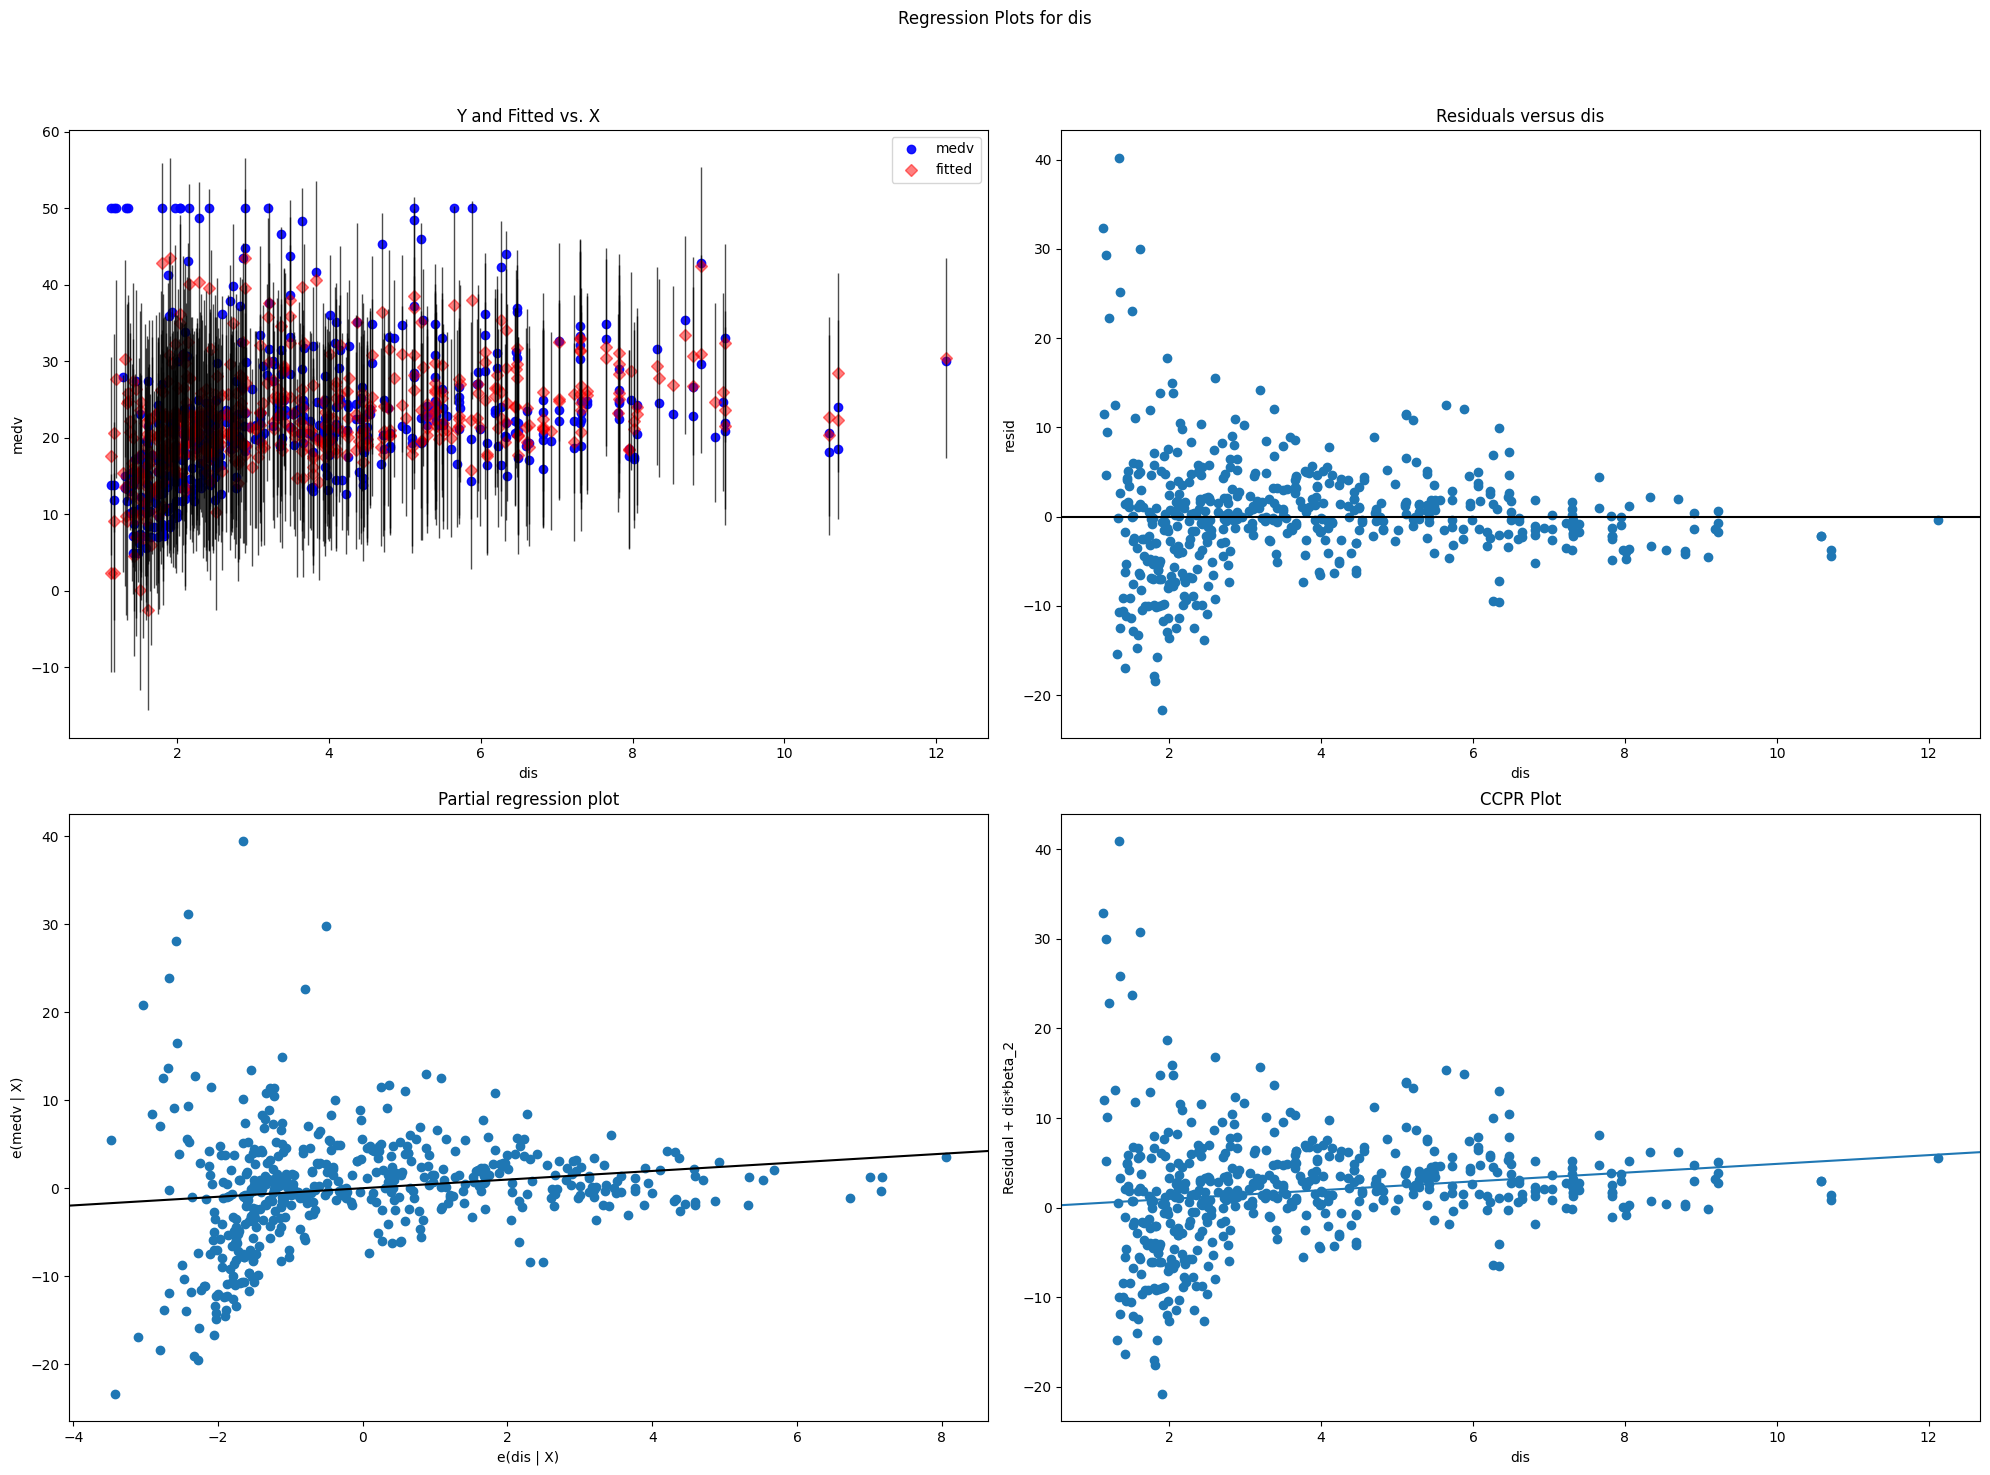

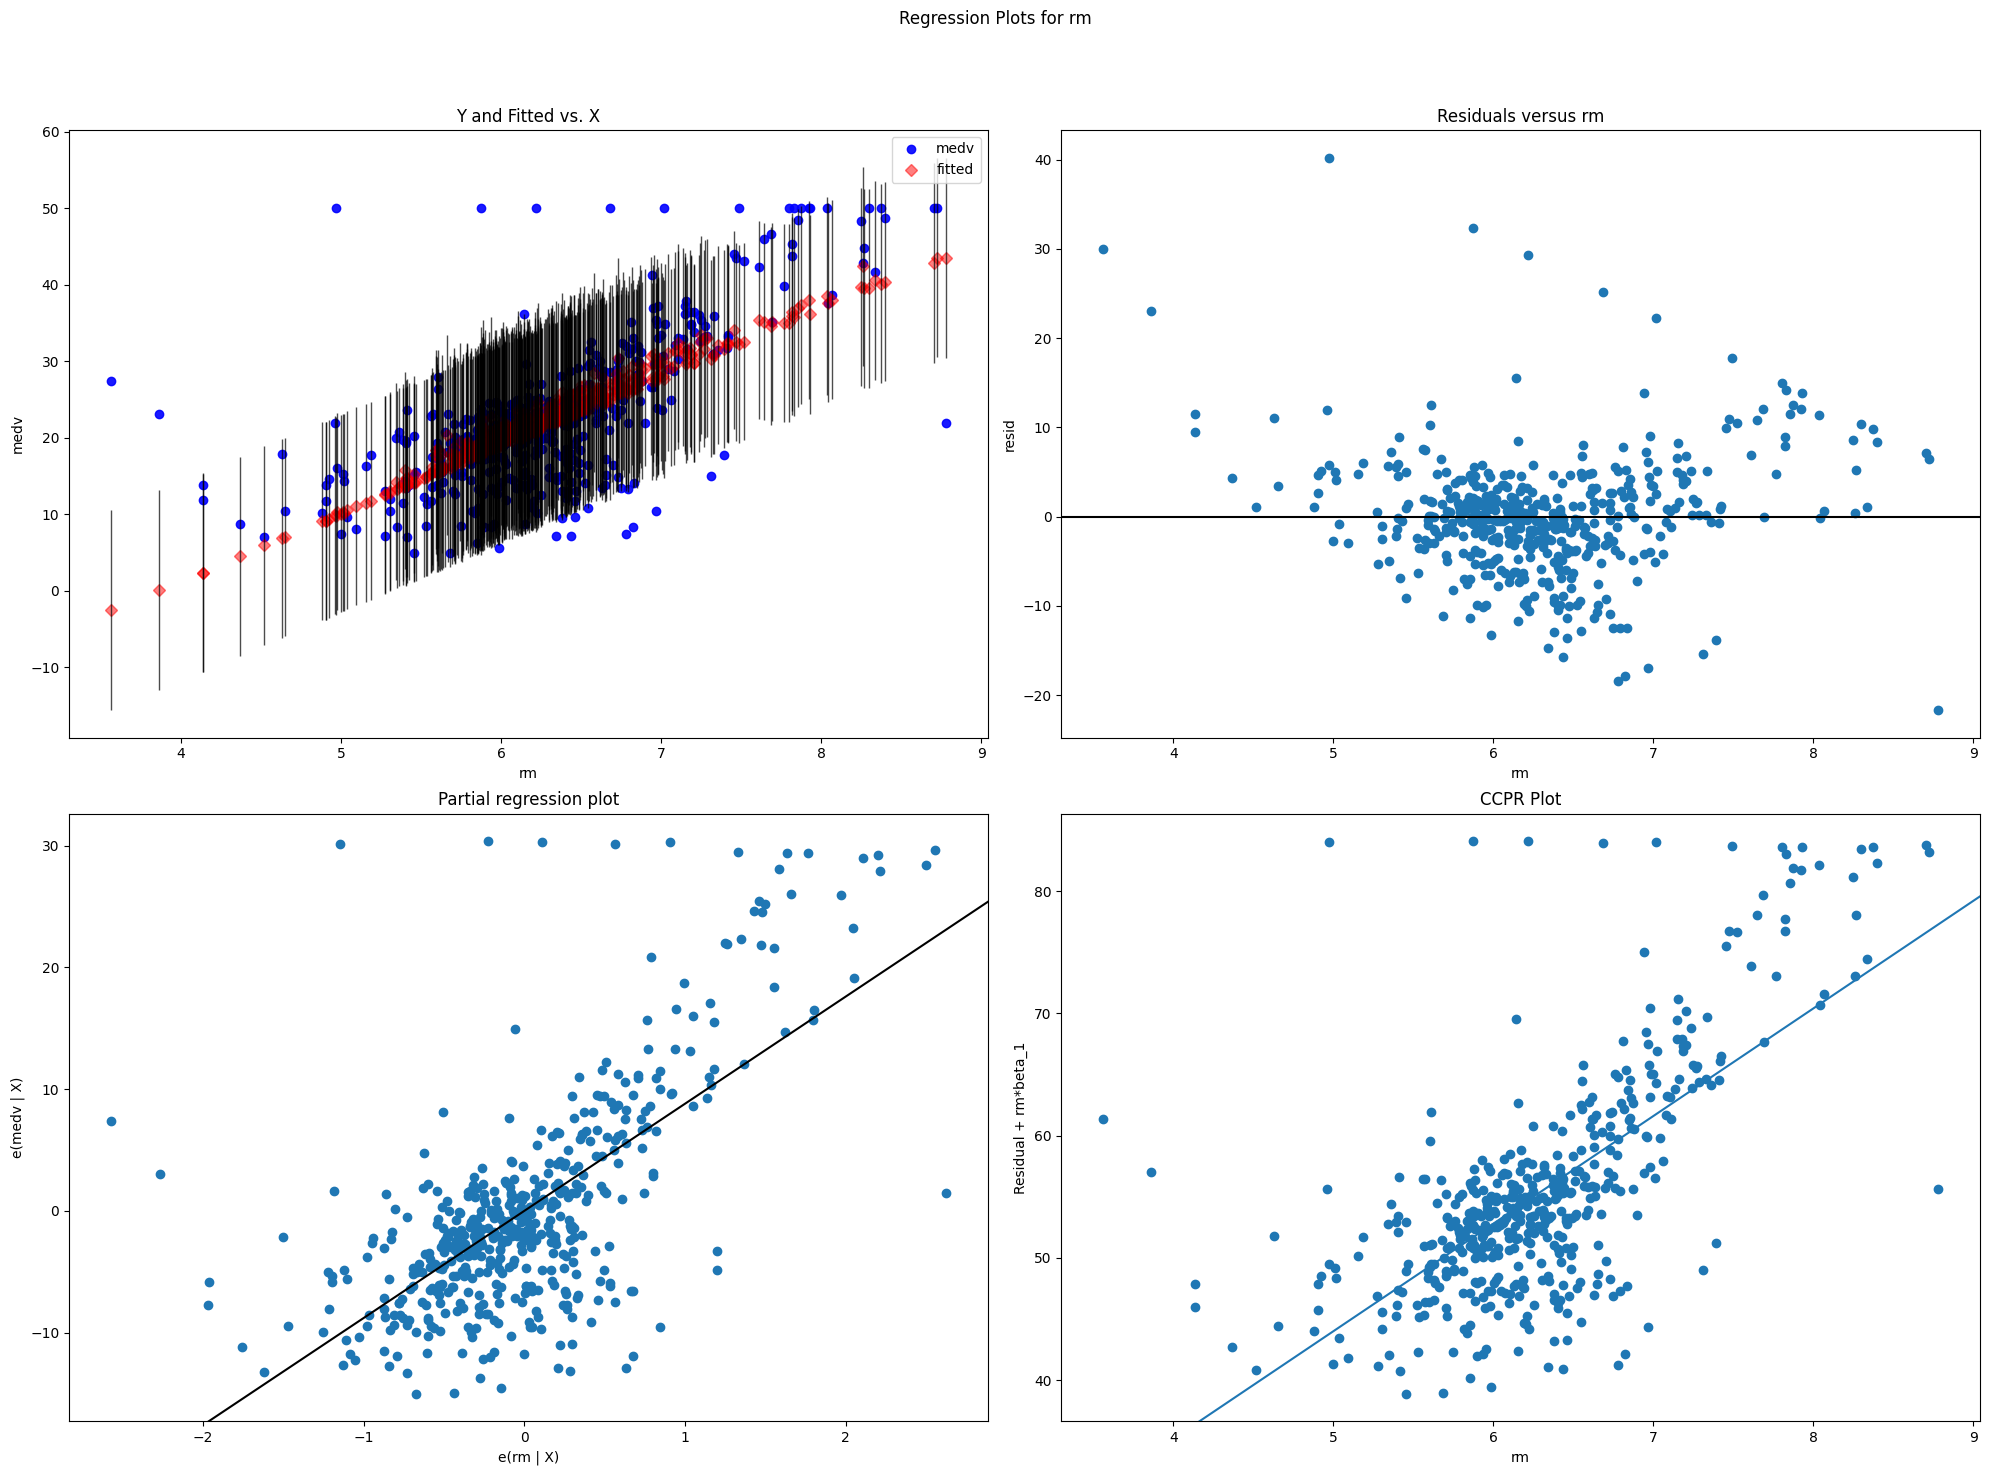

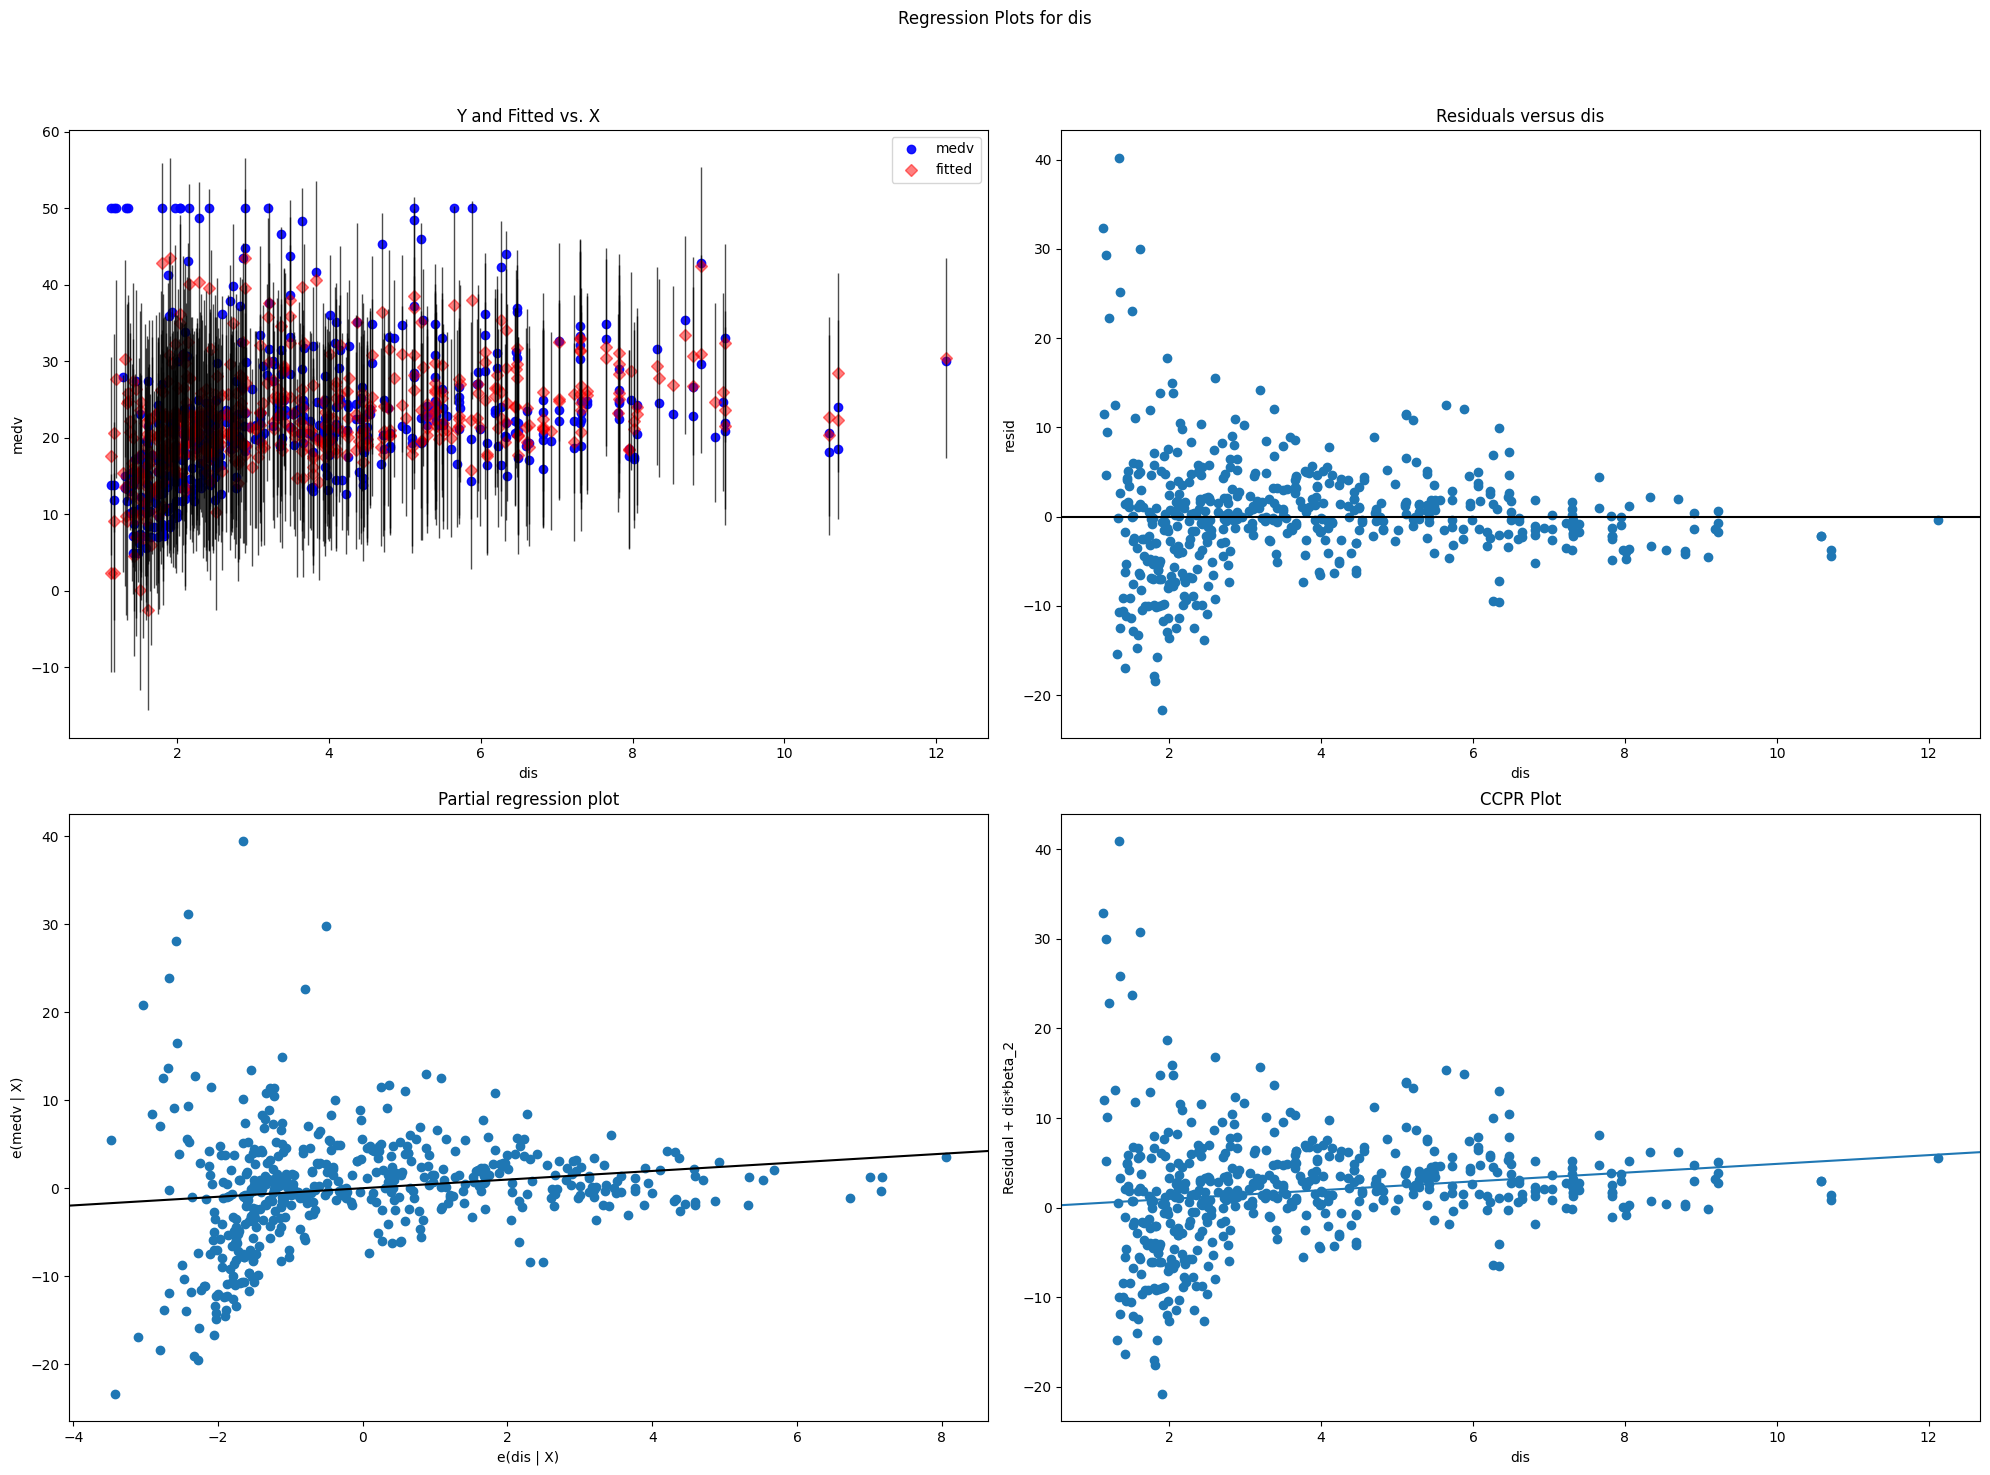

In [53]:
# Add your code here
print(results2.summary())

#Answers here:
'''
(ii) In the context of the Boston dataset the null hypothesis states that there is NO correlation between the median home value and all other variables in the dataset
(iii) Both rm & dis are predictive of the median value based on their individual p-values and F-statistic
(iv) There appear to be greater outliers in the rm variable with some homes with fewer rooms having a higher median value. Outliers in sample could potentially skew a model away from 
        a true population-level relationship, increase our variance and potentially introduce noise.
''' 
fig = plt.figure(figsize=(20 , 15))
fig2 = plt.figure(figsize=(20 , 15))
sm.graphics.plot_regress_exog(results2 , exog_idx='rm' , fig=fig)
sm.graphics.plot_regress_exog(results2 , exog_idx='dis' , fig=fig2)

_(v)_ Fit a second model, this time including an interaction between the two predictor variables. Is there an interaction? (Hint: add a variable `x1 * x2` where `x1` and `x2` are the predictor variables). State an interpretation of the interaction, in the context of the `Boston` dataset, in one or two sentences.

/var/folders/d7/l8wqbmzx3m74cqmpn7nsvgch0000gn/T/ipykernel_78775/2571061881.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x3['rm_x_dis'] = x3['rm']*x3['dis']


                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.516
Model:                            OLS   Adj. R-squared:                  0.513
Method:                 Least Squares   F-statistic:                     178.7
Date:                Sun, 02 Jun 2024   Prob (F-statistic):           8.37e-79
Time:                        21:05:43   Log-Likelihood:                -1656.5
No. Observations:                 506   AIC:                             3321.
Df Residuals:                     502   BIC:                             3338.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    -15.2533      4.895     -3.116      0.0

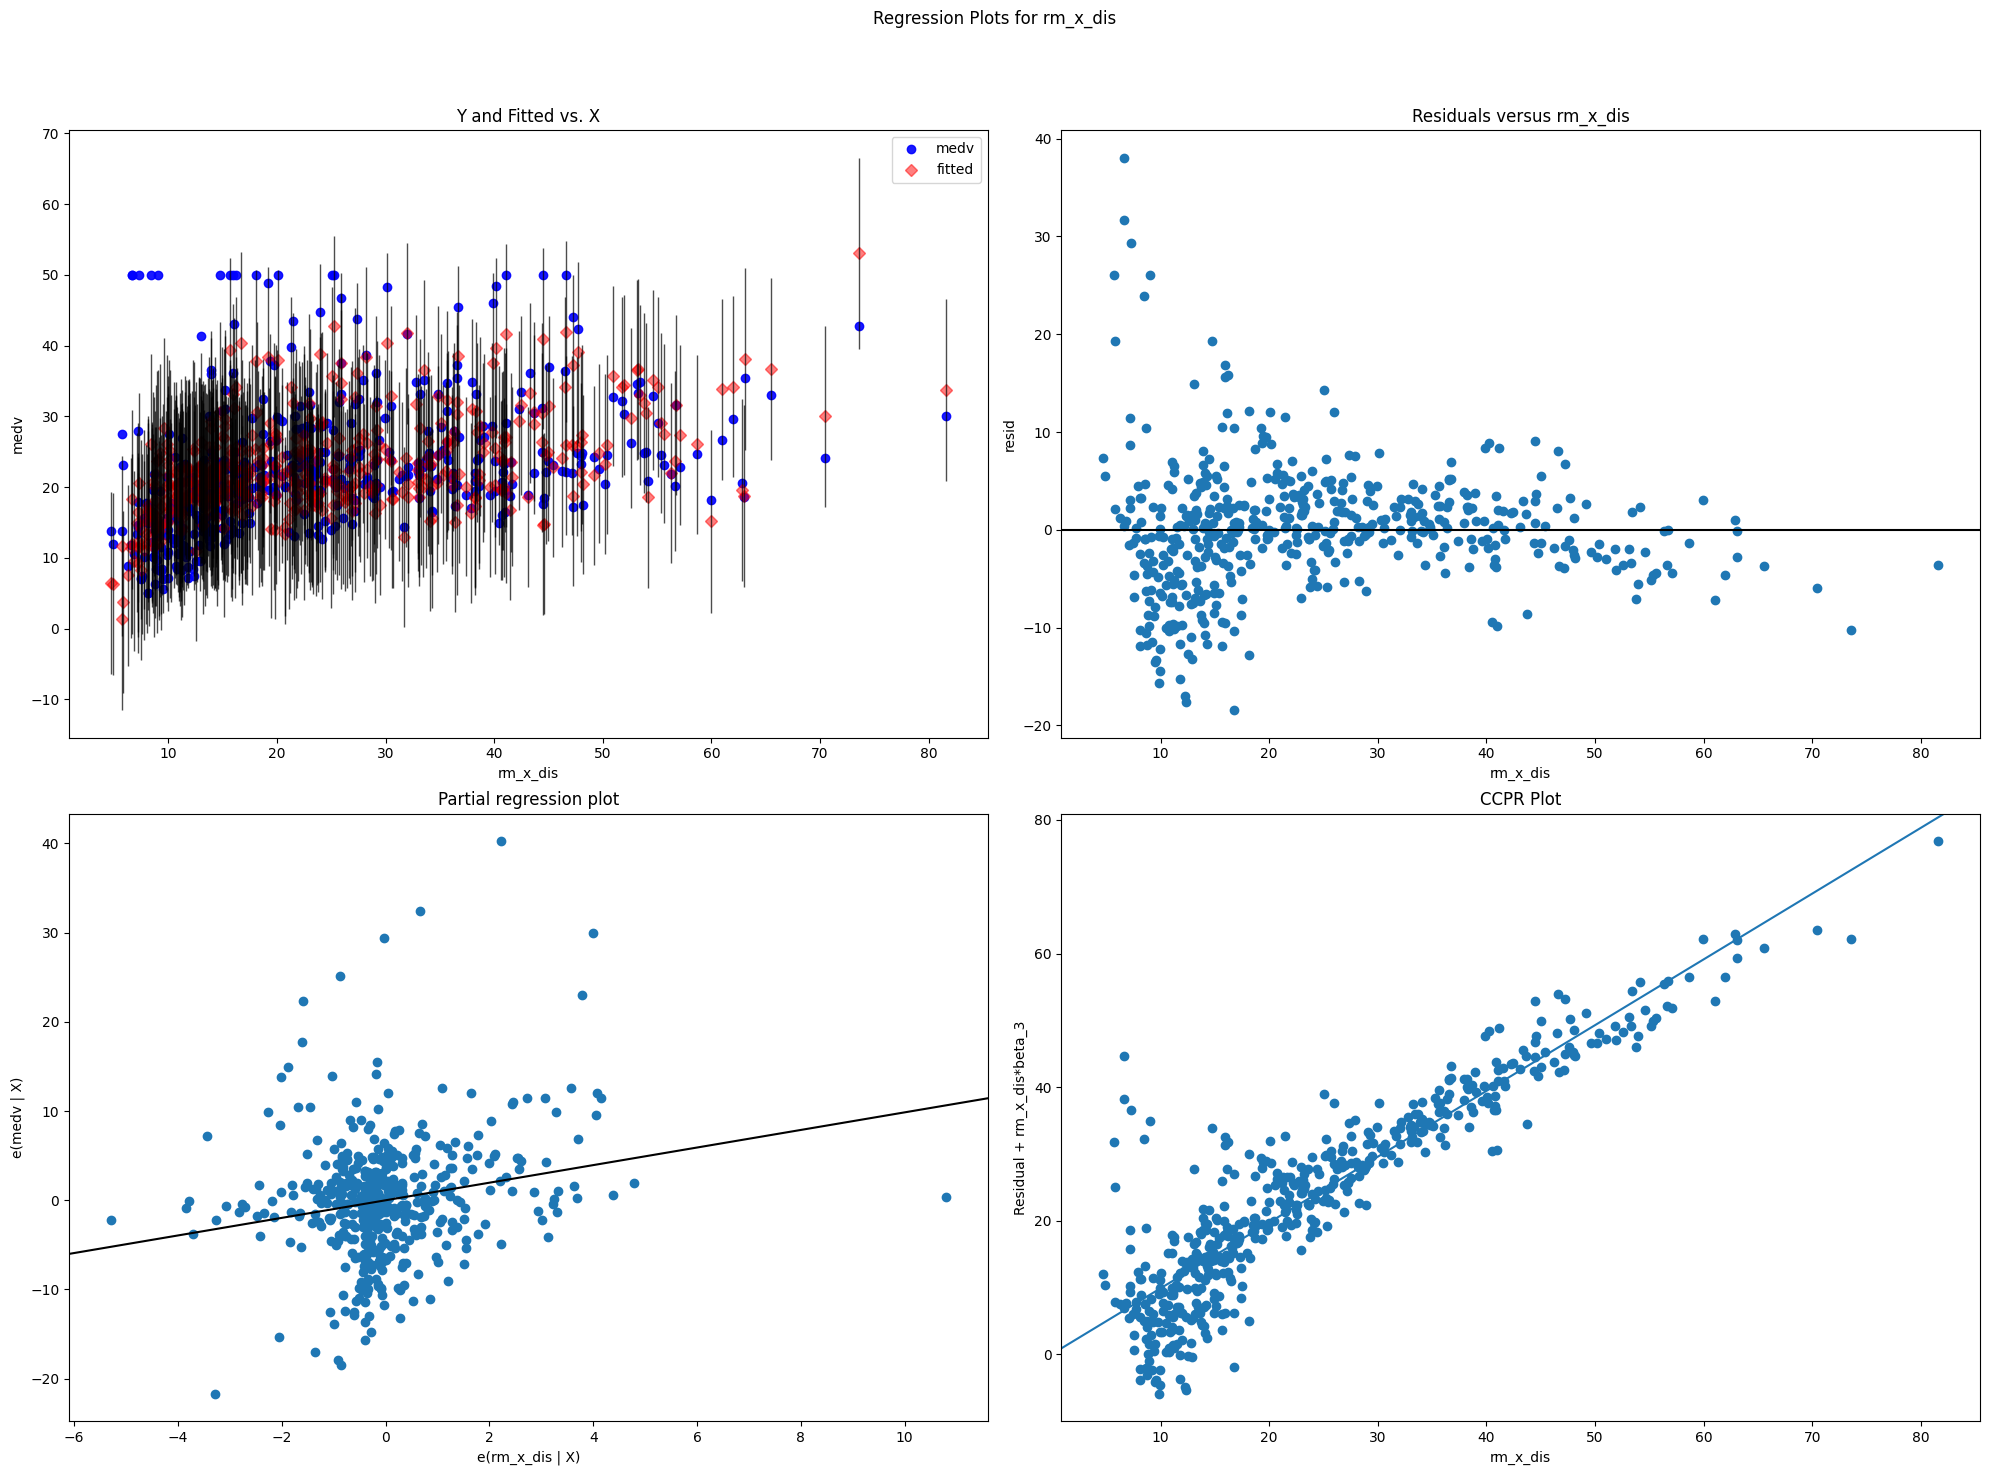

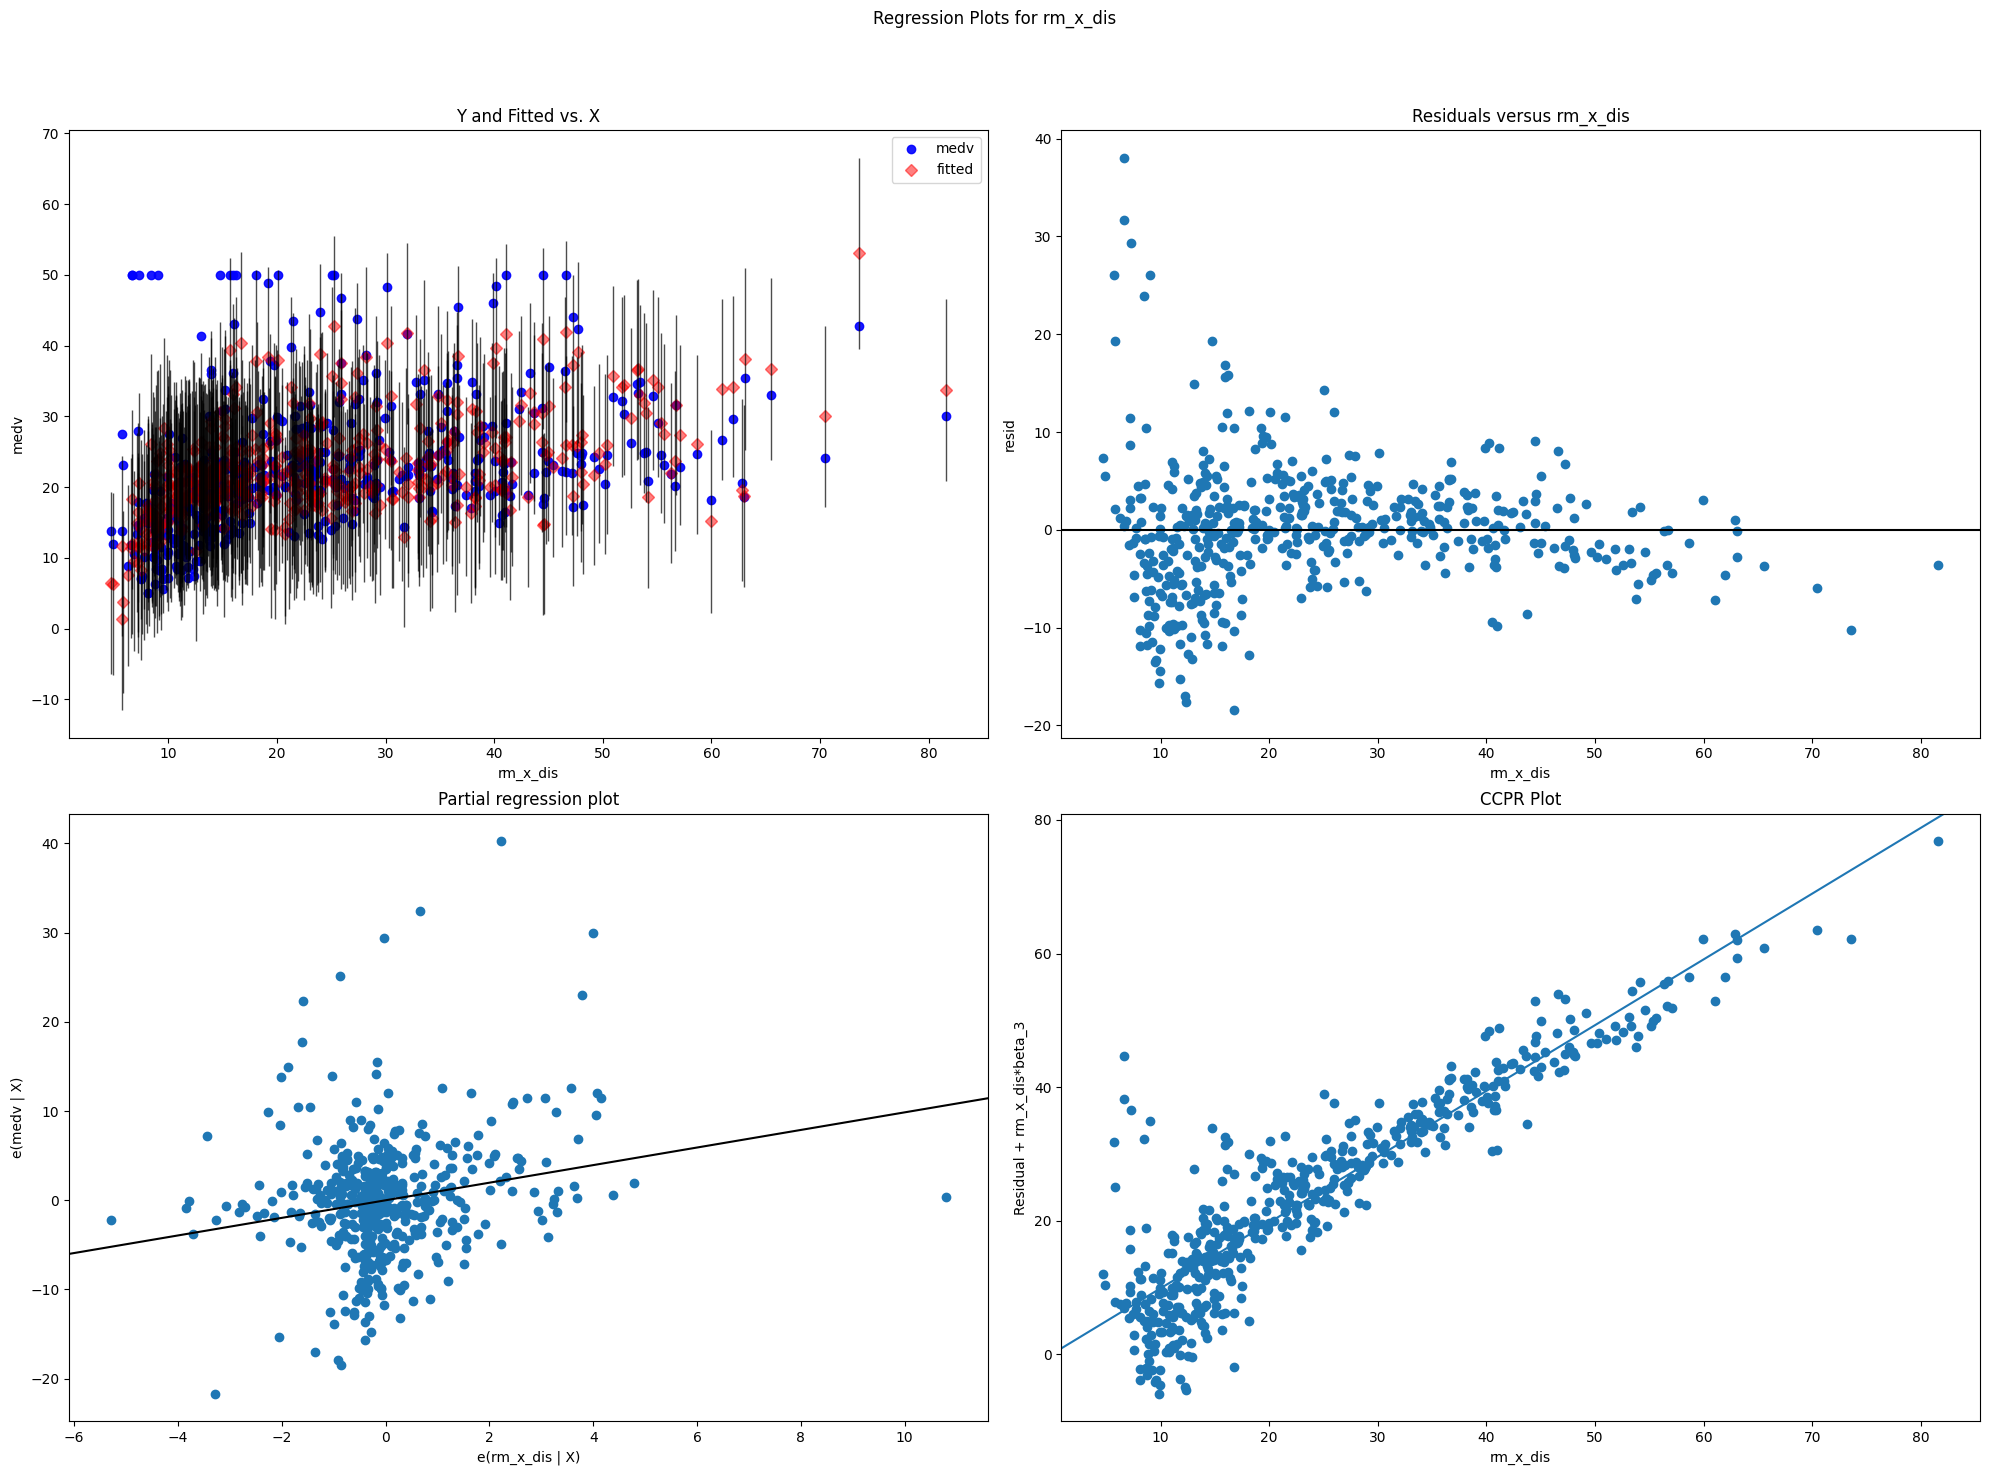

In [58]:
# Add your code here
x3 = Boston[['rm' , 'dis']]
x3['rm_x_dis'] = x3['rm']*x3['dis']
x_interaction = sm.add_constant(MS(['rm' , 'dis' , 'rm_x_dis']).fit_transform(x3) , prepend=True , has_constant='skip')
model3 = sm.OLS( y , x_interaction )

results_inter = model3.fit()
print(results_inter.summary() )

fig3 = plt.figure(figsize=(20 , 15 ))
sm.graphics.plot_regress_exog(results_inter , exog_idx='rm_x_dis' , fig=fig3)
''' 
_(v)_ There doesn't appear to be an interaction between the average rooms and distance to employment centers based on 1) maginal difference in adjusted R-squared, 
        2) insignificant impact to F-statistic, 3) the residual plots for the interaction variable don't show a marked trend and are similar to the single variable 'dis' trend
'''


# Criteria

|Criteria            |Complete           |Incomplete          |
|--------------------|---------------|--------------|
|Simple Linear Regression - Standard errors for $B_0$ and $B_1$|The standard errors are correct.|The standard errors are not correct.|
|Simple Linear Regression - Confidence intervals for $B_0$ and $B_1$|The confidence intervals are correct.|The confidence intervals are not correct.|
|Multiple Linear Regression - Null and alternative hypotheses|The relationship for both hypotheses has been correctly identified.|The relationship for both hypotheses has been incorrectly identified.|
|Multiple Linear Regression - Interpretation of the interaction|The interaction has been correctly identified.|The interaction has been incorrectly identified.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Note:

If you like, you may collaborate with others in the cohort. If you choose to do so, please indicate with whom you have worked with in your pull request by tagging their GitHub username. Separate submissions are required.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/applied_statistical_concepts/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.
